In [167]:
def librerias():

    '''Empezamos importando las librerìas que se va a utilizar'''

import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus
from sklearn.metrics import confusion_matrix

print(librerias.__doc__)

Empezamos importando las librerìas que se va a utilizar


In [168]:
def importarData():
    
    ''' Creamos la funciòn para importar nuestro Dataset '''

df= pd.read_csv('water_potability.csv')
print(df, '\n')

print(importarData.__doc__)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [169]:
def DatNulos():

    ''' Creamos una funciòn la cual nos ayudarà a reemplazar los valores vacios que existen en nuestra Dataset a valores en Cero, ya que al tener valores nulos nos presenta problemas al crear nuestro àrbol de decisiòn '''

df= pd.read_csv('water_potability.csv')
df= df.fillna(0)

print(df, '\n')

print(DatNulos.__doc__)


            ph    Hardness        Solids  Chloramines     Sulfate  \
0     0.000000  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    0.000000   
2     8.099124  224.236259  19909.541732     9.275884    0.000000   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    0.000000   
3273  9.419510  175.762646  33155.578218     7.350233    0.000000   
3274  5.126763  230.603758  11983.869376     6.303357    0.000000   
3275  7.874671  195.102299  17404.177061     7.509306    0.000000   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [170]:
def defCarac():
    

    ''' Creamos la funciòn que nos permite separar los datos de nuestra Dataset, en este caso escogemos las caracteristicas (X) la cuales nos serviran para realizar nuestra predicciòn'''

caracteristicas= ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 
                  'Organic_carbon', 'Trihalomethanes', 'Turbidity']

X= df[caracteristicas]
    
    
print(defCarac.__doc__)


 Creamos la funciòn que nos permite separar los datos de nuestra Dataset, en este caso escogemos las caracteristicas (X) la cuales nos serviran para realizar nuestra predicciòn


In [171]:
def defEtiq():

    ''' Seguidamente escogemos la etiqueta la cual nos permitirà predecir un valor'''
    
y= df['Potability']

print(defEtiq.__doc__)

 Seguidamente escogemos la etiqueta la cual nos permitirà predecir un valor


In [172]:
def mostrar():
    
    ''' Mediante un print se procede a imprimir los datos de las columnas X y Y'''
    
print("Separamos las columnas: ", X, y, '\n', sep='\n' )

print(mostrar.__doc__)

Separamos las columnas: 
            ph    Hardness        Solids  Chloramines     Sulfate  \
0     0.000000  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    0.000000   
2     8.099124  224.236259  19909.541732     9.275884    0.000000   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    0.000000   
3273  9.419510  175.762646  33155.578218     7.350233    0.000000   
3274  5.126763  230.603758  11983.869376     6.303357    0.000000   
3275  7.874671  195.102299  17404.177061     7.509306    0.000000   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.8853

In [174]:
def crearFunc():
    
    ''' Creamos la funciòn para poder entrenar el modelo, se toma el 70% de datos para entrenar
y el 30% de datos se toma para realizar las pruebas al azar '''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
print(crearFunc.__doc__)

 Creamos la funciòn para poder entrenar el modelo, se toma el 70% de datos para entrenar
y el 30% de datos se toma para realizar las pruebas al azar 


In [189]:
def funcArb():
    
    ''' Como primer paso se crea el àrbol de decisiòn y se entrena el modelo para que revele la predicciòn de los datos de prueba'''
    
clf= DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
    
print(funcArb.__doc__)

 Como primer paso se crea el àrbol de decisiòn y se entrena el modelo para que revele la predicciòn de los datos de prueba


In [190]:
def guardImg():
    
    ''' Luego se procede a guardar el àrbol mediante una imagen'''
    
data = tree.export_graphviz(dtree, out_file=None, feature_names=caracteristicas)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')
    
print(guardImg.__doc__)

 Luego se procede a guardar el àrbol mediante una imagen


<IPython.core.display.Javascript object>


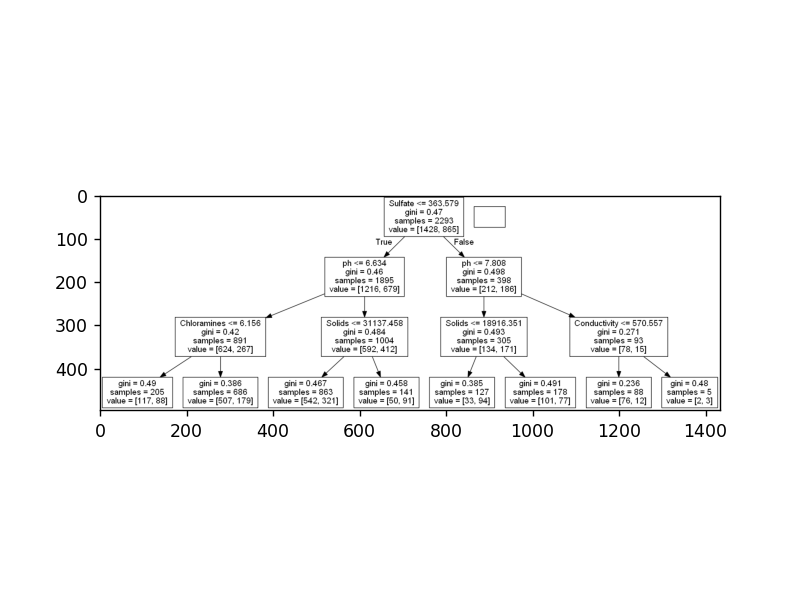

Finalmente creamos la funciòn para mostrar la imagen de nuestro àrbol


In [191]:
def impArb():
    
    '''Finalmente creamos la funciòn para mostrar la imagen de nuestro àrbol'''
    
img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

print(impArb.__doc__)

In [198]:
def metAccu():
    
    ''' Se procede a evaluar el modelo entrenado mediante las metricas empezamos evaluando el Accuray'''

print("Accuracy:", metrics.accuracy_score(y_test, y_pred), '\n')
    
print(metAccu.__doc__)

Accuracy: 0.602238046795524 

 Se procede a evaluar el modelo entrenado mediante las metricas empezamos evaluando el Accuray


In [195]:
def metPrec():
    
    ''' Se procede a imprimir la segunda evaluaciòn la cuàl es mediante la Precision'''

print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'), '\n')
    
print(metPrec.__doc__)

Precision: 0.611183402009687 

 Se procede a imprimir la segunda evaluaciòn la cuàl es mediante la Precision


In [199]:
def metRec():
    
    ''' Se procede a imprimir la ùltima evaluaciòn la cuàl es mediante el Recall'''

print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'), '\n')
    
print(metRec.__doc__)

Recall: 0.5132113559249237 

 Se procede a imprimir la ùltima evaluaciòn la cuàl es mediante el Recall


<IPython.core.display.Javascript object>


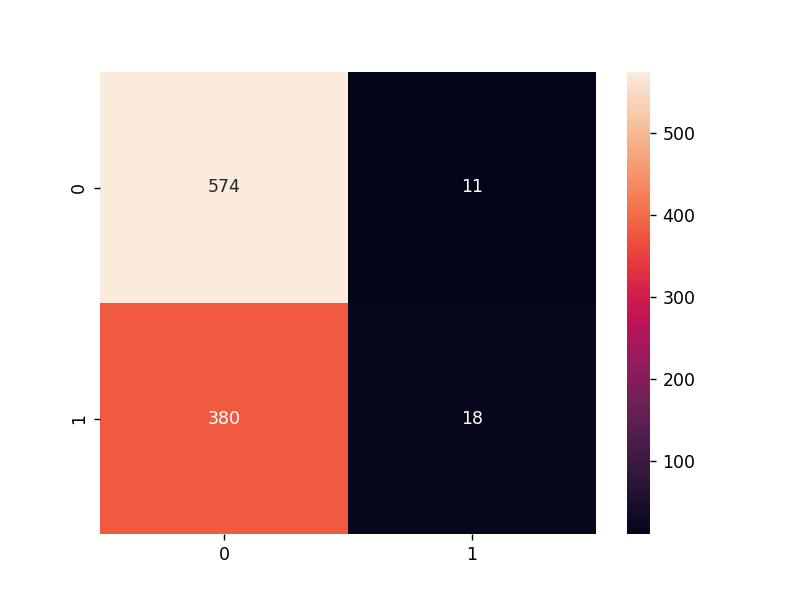

 Creamos la Matriz de Confusiòn, mediante el modelo entrenado


In [193]:
def crearDF():
    
    ''' Creamos la Matriz de Confusiòn, mediante el modelo entrenado'''
    
Matrix = confusion_matrix(y_test, y_pred)
sn.heatmap(Matrix, annot=True, fmt= 'd')
plt.show()

print(crearDF.__doc__)

In [200]:
def CalAcc():
    
    ''' Se realiza el cálculo matemático para conocer el valor de Accurrancy tomando los valores presentados en la Matriz de Confusión'''

Accur= (574+18)/983
print(Accur, '\n')

print(CalAcc.__doc__)

0.602238046795524 

 Se realiza el cálculo matemático para conocer el valor de Accurrancy tomando los valores presentados en la Matriz de Confusión


In [201]:
def CalPrecis():
    
    ''' Se realiza el cálculo matemático para conocer el valor de Precisión tomando los valores presentados en la Matriz de Confusión'''

Precis= (574)/(574+11)
print(Precis, '\n')

print(CalPrecis.__doc__)

0.9811965811965812 

 Se realiza el cálculo matemático para conocer el valor de Precisión tomando los valores presentados en la Matriz de Confusión


In [202]:
def CalRecall():
    
    ''' Se realiza el cálculo matemático para conocer el valor de Recall tomando los valores presentados en la Matriz de Confusión'''

Recall= (574)/(574+380)
print(Recall, '\n')

print(CalRecall.__doc__)

0.6016771488469602 

 Se realiza el cálculo matemático para conocer el valor de Recall tomando los valores presentados en la Matriz de Confusión


In [ ]:
def CalSpec():
    
    ''' Se realiza el cálculo matemático para conocer el valor de Especificaciòn tomando los valores presentados en la Matriz de Confusión'''

Specif= (2)/(6)
print(Specif, '\n')

print(CalSpec.__doc__)

In [ ]:
def CalFP():
    
    ''' Se realiza el cálculo matemático para conocer el valor de Falsos Positivos tomando los valores de la Matriz de Confusión'''

FP= (4)/(4+2)
print(FP, '\n')

print(CalFP.__doc__)

In [ ]:
def CalFN():
    
    ''' Se realiza el cálculo matemático para conocer el valor de Falsos Negativos tomando los valores de la Matriz de Confusión'''

FN= (411)/(411+566)
print(FN, '\n')

print(CalFN.__doc__)

In [ ]:
def CalScore():
    
    ''' Se realiza el cálculo matemático para conocer el valor del Score tomando los valores de la Matriz de Confusión'''

Score= (2*566)/(2*566+4+411)
print(Score, '\n')

print(CalScore.__doc__)